**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Loading Dataset**

In [ ]:
data = pd.read_csv("/content/titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# Fill missing numeric values with median
for col in data.columns:
    if data[col].dtype != 'object':
        data[col].fillna(data[col].median(), inplace=True)


/tmp/ipython-input-3637707361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# Remove duplicates
data.drop_duplicates(inplace=True)


**Feature Engineering**

In [ ]:
# Check column names
print(data.columns)

# Example: if your dataset has 'RM' and 'TAX'
if 'RM' in data.columns and 'TAX' in data.columns:
    data['ROOMS_PER_PERSON'] = data['RM'] / data['TAX']
else:
    print("Required columns not found in dataset")

# Example: age category
if 'Age' in data.columns:
    data['AGE_CATEGORY'] = pd.cut(
        data['Age'],
        bins=[0, 35, 70, 100],
        labels=['New', 'Mid', 'Old']
    )
else:
    print("Age column not found in dataset")

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AGE_CATEGORY'],
      dtype='object')
Required columns not found in dataset


In [ ]:
# Convert categorical column to numeric
data = pd.get_dummies(data, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])


In [ ]:
data.to_csv("boston_cleaned.csv", index=False)
print("✅ Data cleaned & saved as boston_cleaned.csv")


✅ Data cleaned & saved as boston_cleaned.csv


**Convert Categorial columns using one hot encoding**

In [ ]:
# Check column types
print(data.dtypes)

# Select categorical columns automatically
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data_encoded.head())

PassengerId           int64
Survived              int64
Pclass                int64
Age                 float64
SibSp               float64
                     ...   
Cabin_G6               bool
Embarked_Q             bool
Embarked_S             bool
AGE_CATEGORY_Mid       bool
AGE_CATEGORY_Old       bool
Length: 866, dtype: object
Categorical columns: Index([], dtype='object')
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0          892         0       3  0.386231 -0.499470 -0.400248 -0.497413   
1          893         1       3  1.371370  0.616992 -0.400248 -0.512278   
2          894         0       2  2.553537 -0.499470 -0.400248 -0.464100   
3          895         0       3 -0.204852 -0.499470 -0.400248 -0.482475   
4          896         1       3 -0.598908  0.616992  0.619896 -0.417492   

   Name_Abelseth, Miss. Karen Marie  Name_Abelseth, Mr. Olaus Jorgensen  \
0                             False                               False   
1          

**Train Test Split**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Logistic Regression Mode**l

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)  # increased iterations to avoid convergence warning
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
 [[50  0]
 [ 0 34]]


**Bar Chart of Impact Parameters**

/tmp/ipython-input-3590675844.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')


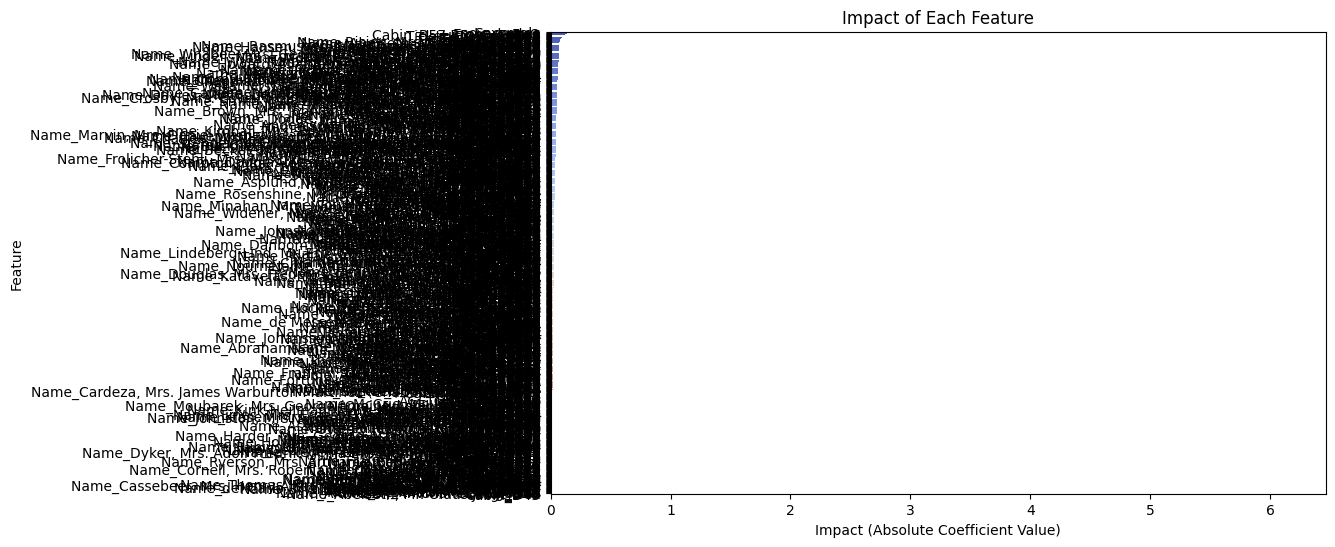

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: feature_importance from Logistic Regression
# Assuming model is trained and X is your features DataFrame
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')
plt.title("Impact of Each Feature")
plt.xlabel("Impact (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()


**Pie Chart of Impact Parameters**

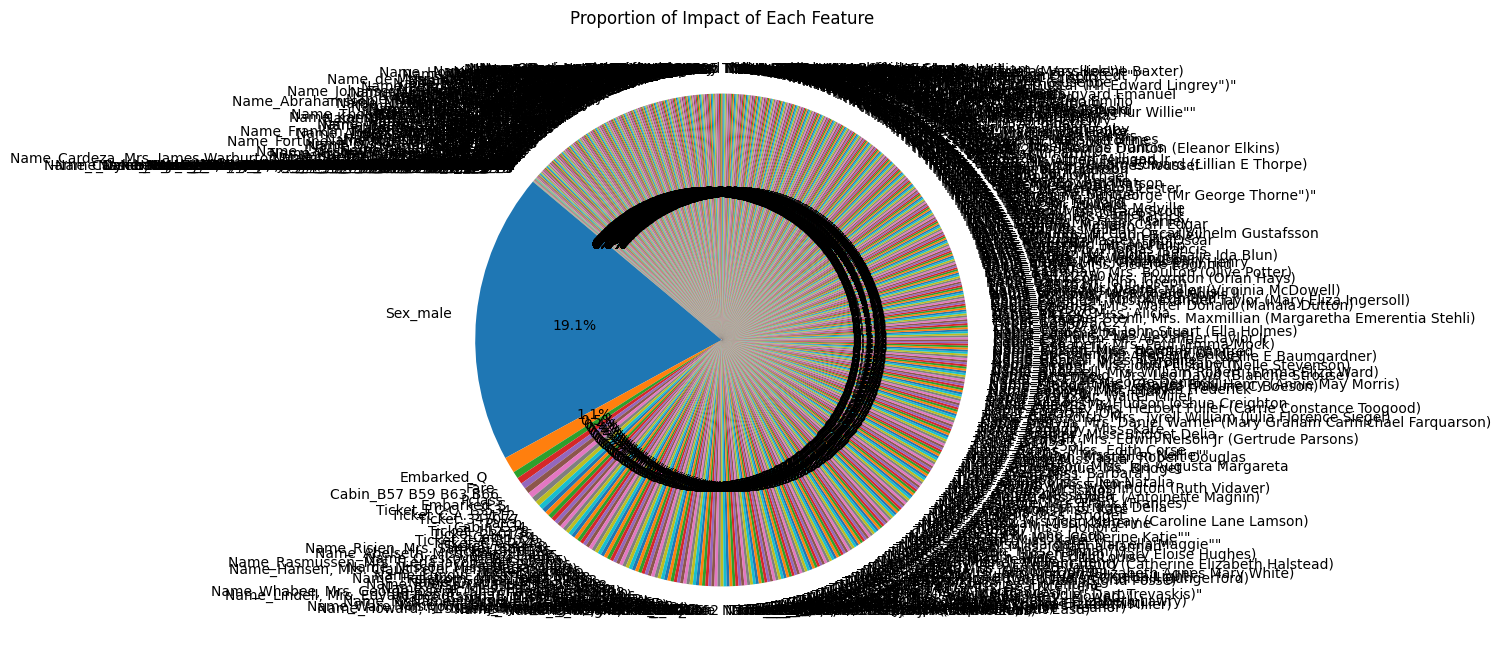

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(feature_importance.values, labels=feature_importance.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Impact of Each Feature")
plt.show()


**Evaluate using accuracy,recall and confusion matrix**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


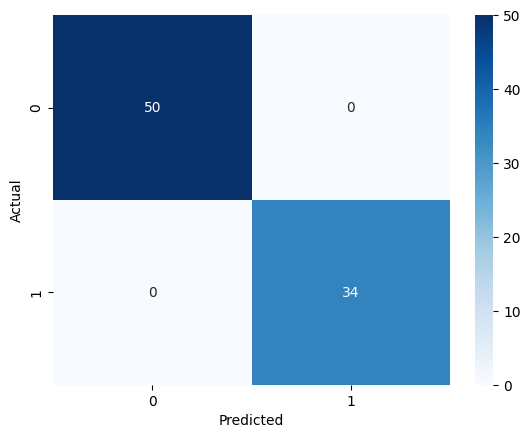

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
